<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Computer Vision</h1>

<h2>Imports<h2>

In [3]:
from PIL import Image
import io
import os
import random
import requests
import numpy as np
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import metrics
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Activation, Dense, BatchNormalization,  Dropout
# from tensorflow.keras import optimizers
# from tensorflow.keras.metrics import categorical_crossentropy
# from tensorflow.keras.metrics import categorical_accuracy


**Gebruik een <i>environment variable</i> voor het instellen van het logleven van TensorFlow**

In [4]:
os.environ['TF_CPP_MIN_LEVEL'] = '2'

<h2>Data Collection</h2>

<h3>Data downloaden</h3>

In [5]:
txtFiles = list()

In [6]:
hiDirectory = 'pics2/2750/Highway'
 
for filename in os.listdir(hiDirectory):
    txtFile = os.path.join(hiDirectory, filename)
    txtFiles.append(txtFile)
    # print(txtFile)

In [7]:
riDirectory = 'pics2/2750/River'
 
for filename in os.listdir(riDirectory):
    txtFile = os.path.join(riDirectory, filename)
    txtFiles.append(txtFile)
    # print(txtFile)

In [8]:
# # get file names
# txtFiles = list()

# for txtFile in dataFile.namelist():
#     txtFiles.append(txtFile)
    


<h3>Data filteren</h3>

In [9]:
txtFiles = [x for x in txtFiles if ".jpg" in x]

<h3>Data inlezen</h3>

In [10]:
imageObjects = np.zeros([len(txtFiles), 64, 64, 3])

i = 0

for pic in txtFiles:
  imageObjects[i] = np.asarray(Image.open(txtFiles[i])).astype('uint8')/255
  i += 1
    
# print(imageObjects[0])    

**Gebruik de bestandsnamen voor het verkrijgen van de labels**

In [11]:
imageLabels = np.empty(len(txtFiles), dtype = 'S20')

i = 0

for label in txtFiles:
    txtFiles[i] = label.split('/')[2]
    i += 1

print(label)    
print(txtFiles[0])    


pics2/2750/River/River_2146.jpg
Highway


In [12]:
# change them to integers in alphabetical order
labelNames, labelNumbers = np.unique(txtFiles, return_inverse=True)
labelDict = dict(zip(np.unique(labelNumbers), labelNames))
 # print(labelNames)
 # print(labelNumbers)

np.array(np.unique(labelNumbers, return_counts=True)).T

array([[   0, 2500],
       [   1, 2500]])

<h3>Data splitten</h3>

In [13]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.75, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)
print(nrOfImages)

(3750, 64, 64, 3)
3750


<h3>Data inspecteren</h3>

In [14]:
def inspectData():
    
    plt.figure(figsize=(10,10))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        number = i
        plt.imshow(trainSet[number])
        plt.xlabel(labelNames[trainLabels[number]]) 
    
    plt.show()

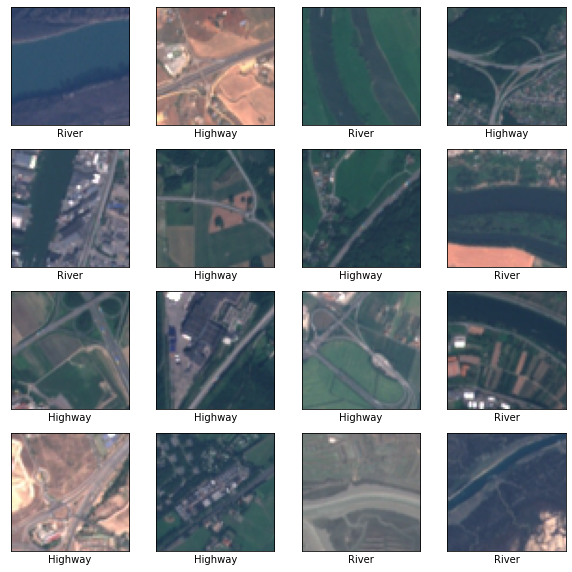

In [15]:
inspectData()    

<h2>Maak een model</h2>

<h3>Definieer de netwerktopologie</h3>

<h3>Exercise 1</h3>
<p>
    Vul de netwerktopologie tot een bruikbaar Neural Netwerk onstaat.
</p>

In [16]:
num_classes = len(labelNames)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

2022-10-20 11:48:18.517464: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h3>Definieer de trainparameters</h3>

In [17]:
lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
nrOfEpochs = 5

<h3>Train het model</h3>

In [18]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history = model.fit(trainSet, trainLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)

Epoch 1/5
59/59 - 6s - loss: 0.6054 - accuracy: 0.6579 - 6s/epoch - 109ms/step
Epoch 2/5
59/59 - 6s - loss: 0.5247 - accuracy: 0.7475 - 6s/epoch - 99ms/step
Epoch 3/5
59/59 - 7s - loss: 0.4553 - accuracy: 0.7976 - 7s/epoch - 111ms/step
Epoch 4/5
59/59 - 6s - loss: 0.4170 - accuracy: 0.8224 - 6s/epoch - 105ms/step
Epoch 5/5
59/59 - 6s - loss: 0.3906 - accuracy: 0.8328 - 6s/epoch - 104ms/step


<h3>Test het model</h3>

In [19]:
model.compile(optimizer=gdAlgorithm, loss=lossFunction, metrics="accuracy")
history_test = model.fit(testSet, testLabels, epochs=nrOfEpochs, batch_size=64, verbose=2)


Epoch 1/5
20/20 - 3s - loss: 0.3852 - accuracy: 0.8312 - 3s/epoch - 131ms/step
Epoch 2/5
20/20 - 2s - loss: 0.3690 - accuracy: 0.8368 - 2s/epoch - 109ms/step
Epoch 3/5
20/20 - 2s - loss: 0.3229 - accuracy: 0.8640 - 2s/epoch - 103ms/step
Epoch 4/5
20/20 - 2s - loss: 0.2954 - accuracy: 0.8768 - 2s/epoch - 112ms/step
Epoch 5/5
20/20 - 2s - loss: 0.2733 - accuracy: 0.8856 - 2s/epoch - 120ms/step


<h3>Exercise 2</h3>
<p>
    Test het Neural Netwerk met de testset en laat zien of het in staat is de juiste class te vinden.
</p>

40/40 - 1s - loss: 0.2835 - accuracy: 0.8816 - 955ms/epoch - 24ms/step


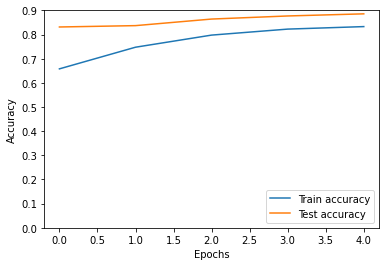

In [20]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history_test.history['accuracy'], label = 'Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 0.9])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testSet,  testLabels, verbose=2)

In [21]:
trainSet, testSet, trainLabels, testLabels = train_test_split(imageObjects, labelNumbers, stratify = labelNumbers, train_size = 0.75, random_state=42)
print(trainSet.shape)
nrOfImages = len(trainSet)
print(nrOfImages)

(3750, 64, 64, 3)
3750


In [22]:
pred = model.predict(testSet, batch_size=16)

pred = np.argmax(pred, axis=-1)

print(pred)

# original labels

actual = np.argmax(testLabels,axis=-1)

# from sklearn.metrics import classification_report

# print(classification_report(labels, pred))

conf_matrix = tf.math.confusion_matrix(labels=testLabels, predictions=pred)

print(conf_matrix)

[1 1 1 ... 1 1 1]
tf.Tensor(
[[505 120]
 [ 28 597]], shape=(2, 2), dtype=int32)


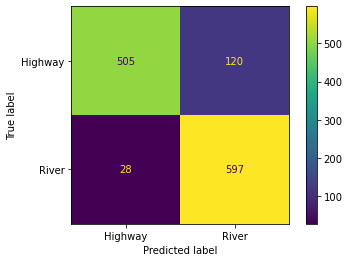

In [23]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = testLabels
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Highway', 'River'])

cm_display.plot()
plt.show()

This image most likely belongs to Highway with a 58.65 percent confidence.
River
(64, 64, 3)


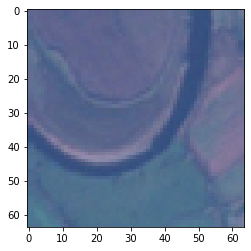

In [34]:
#hier kies je welke index je iets mee wilt
i = 24

#dit is het plaatje van index i
img = trainSet[i]

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Change dims to fit model

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labelNames[np.argmax(score)], 100 * np.max(score))
)

# # print de label naam van index i
print(labelNames[trainLabels[i]])

# #laat plaatje zien
plt.imshow(img)

print(img.shape)
# print(img)


In [25]:
# Omdat het cnn uitgebreider is heeft het minder training nodig om tot een optimaal resultaat te komen.